<a href="https://colab.research.google.com/github/Farhana005/monkeyPoxPre/blob/main/MonkeyPoxVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import folium
import os

import warnings
warnings.filterwarnings('ignore')

import plotly.graph_objects as go
import time

from datetime import datetime, timedelta

# **Checking Null Values**

In [ ]:
# Create dataframe counting NaN values per column
dff1=pd.read_csv('/content/drive/MyDrive/MonkeyPox/archive/Worldwide_Case_Detection_Timeline.csv')
dff1.rename({'Hospitalised (Y/N/NA)':'Hospitalised', 'Isolated (Y/N/NA)':'Isolated', 'Travel_history (Y/N/NA)':'Travel_history' }, axis = 1, inplace = True)
nan_df = pd.DataFrame(dff1.isna().sum()).reset_index()
nan_df.columns  = ['Column', 'NaN_Count']
nan_df['NaN_Count'] = nan_df['NaN_Count'].astype('int')
nan_df['NaN_%'] = round(nan_df['NaN_Count']/dff1.shape[0] * 100,1)
nan_df['Type']  = 'Incompleteness'
nan_df.sort_values('NaN_%', inplace = True)

# Add completeness
for i in range(nan_df.shape[0]):
    complete_df = pd.DataFrame([nan_df.loc[i,'Column'],dff1.shape[0] - nan_df.loc[i,'NaN_Count'],100 - nan_df.loc[i,'NaN_%'], 'Completeness']).T
    complete_df.columns  = ['Column','NaN_Count','NaN_%','Type']
    complete_df['NaN_%'] = complete_df['NaN_%'].astype('int')
    complete_df['NaN_Count'] = complete_df['NaN_Count'].astype('int')
    nan_df = nan_df.append(complete_df, sort = True)
    

# Missingness Plot
fig = px.bar(nan_df,
             x = 'Column',
             y = 'NaN_%',
            # title = ' Incompleteness within this Dataset',
             color = 'Type',
             template = 'xgridoff',
             opacity = 0.6,
             height = 600,
             color_discrete_sequence = ['#dbdbdb','#38cae0']
            )

fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
# fig.update_xaxes(showticklabels = True,
#                  dtick = "M1",
#                  tickformat = "%b %Y",
#                 )
fig.update_layout(
    font_family="Courier New",
    font_color="black",
   # title_font_family="Times New Roman",
    title_font_color="black",
    legend_title_font_color="black",
    font=dict(
        family="Times New Roman",
        size=14,
        color="black"
    )
)
fig.update_yaxes(title = 'Percentage of NaNs')
fig.update_xaxes(title = 'Column Name')

fig.show()

In [ ]:
dff2=pd.read_csv('/content/drive/MyDrive/MonkeyPox/archive/Monkey_Pox_Cases_Worldwide.csv')
nan_df = pd.DataFrame(dff2.isna().sum()).reset_index()
nan_df.columns  = ['Column', 'NaN_Count']
nan_df['NaN_Count'] = nan_df['NaN_Count'].astype('int')
nan_df['NaN_%'] = round(nan_df['NaN_Count']/dff2.shape[0] * 100,1)
nan_df['Type']  = 'Incompleteness'
nan_df.sort_values('NaN_%', inplace = True)

# Add completeness
for i in range(nan_df.shape[0]):
    complete_df = pd.DataFrame([nan_df.loc[i,'Column'],dff2.shape[0] - nan_df.loc[i,'NaN_Count'],100 - nan_df.loc[i,'NaN_%'], 'Completeness']).T
    complete_df.columns  = ['Column','NaN_Count','NaN_%','Type']
    complete_df['NaN_%'] = complete_df['NaN_%'].astype('int')
    complete_df['NaN_Count'] = complete_df['NaN_Count'].astype('int')
    nan_df = nan_df.append(complete_df, sort = True)
    

# Missingness Plot
fig = px.bar(nan_df,
             x = 'Column',
             y = 'NaN_%',
            # title = ' Incompleteness within this Dataset',
             color = 'Type',
             template = 'xgridoff',
             opacity = 0.6,
             height = 600, width=800,
             color_discrete_sequence = ['#dbdbdb','#38cae0']
            )

fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
# fig.update_xaxes(showticklabels = True,
#                  dtick = "M1",
#                  tickformat = "%b %Y",
#                 )
fig.update_layout(
    font_family="Courier New",
    font_color="black",
   # title_font_family="Times New Roman",
    title_font_color="black",
    legend_title_font_color="black",
    font=dict(
        family="Times New Roman",
        size=14,
        color="black"
    )
)
fig.update_yaxes(title = 'Percentage of NaNs')
fig.update_xaxes(title = 'Column Name')

fig.show()

In [ ]:
dff3=pd.read_csv('/content/drive/MyDrive/MonkeyPox/archive/Daily_Country_Wise_Confirmed_Cases.csv')
nan_df = pd.DataFrame(dff3.isna().sum()).reset_index()
nan_df.columns  = ['Column', 'NaN_Count']
nan_df['NaN_Count'] = nan_df['NaN_Count'].astype('int')
nan_df['NaN_%'] = round(nan_df['NaN_Count']/dff3.shape[0] * 100,1)
nan_df['Type']  = 'Incompleteness'
nan_df.sort_values('NaN_%', inplace = True)

# Add completeness
for i in range(nan_df.shape[0]):
    complete_df = pd.DataFrame([nan_df.loc[i,'Column'],dff3.shape[0] - nan_df.loc[i,'NaN_Count'],100 - nan_df.loc[i,'NaN_%'], 'Completeness']).T
    complete_df.columns  = ['Column','NaN_Count','NaN_%','Type']
    complete_df['NaN_%'] = complete_df['NaN_%'].astype('int')
    complete_df['NaN_Count'] = complete_df['NaN_Count'].astype('int')
    nan_df = nan_df.append(complete_df, sort = True)
    

# Missingness Plot
fig = px.bar(nan_df,
             x = 'Column',
             y = 'NaN_%',
            # title = ' Incompleteness within this Dataset',
             color = 'Type',
             template = 'xgridoff',
             opacity = 0.6,
             height = 600,
             color_discrete_sequence = ['#dbdbdb','#38cae0']
            )

fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
# fig.update_xaxes(showticklabels = True,
#                  dtick = "M1",
#                  tickformat = "%b %Y",
#                 )
fig.update_layout(
    font_family="Courier New",
    font_color="black",
   # title_font_family="Times New Roman",
    title_font_color="black",
    legend_title_font_color="black",
    font=dict(
        family="Times New Roman",
        size=14,
        color="black"
    )
)
fig.update_yaxes(title = 'Percentage of NaNs')
fig.update_xaxes(title = 'Column Name')

fig.show()

# **Geographical Analysis**

In [ ]:
worldwide = pd.read_csv('/content/drive/MyDrive/MonkeyPox/archive/Monkey_Pox_Cases_Worldwide.csv') 

In [ ]:
worldwide.insert(0, 'ID', range(1, 1 + len(worldwide)))

In [ ]:
worldwide.head()

,ID,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,1,England,2325.0,0.0,5.0,2.0,7.0
1,2,Portugal,588.0,0.0,0.0,0.0,34.0
2,3,Spain,3738.0,0.0,11.0,2.0,0.0
3,4,United States,3480.0,0.0,4.0,39.0,6.0
4,5,Canada,681.0,9.0,1.0,2.0,0.0


In [ ]:
def plot_map(df,col):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names', 
                  color=col, hover_name="Country", 
                  title=col, hover_data=[col], height=800,width=1200, color_continuous_scale="blues",
                  projection = 'natural earth',
                  template = 'xgridoff',)
    fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

    fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )
    fig.show()

In [ ]:
plot_map(worldwide, 'Confirmed_Cases')

In [ ]:
def plot_map(df,col):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names', 
                  color=col, hover_name="Country", 
                  title=col, hover_data=[col], height=800,width=1200, color_continuous_scale="blues",
                  projection = 'natural earth',
                  scope = 'europe',
                  template = 'xgridoff',)
    fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

    fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )
    fig.show()

In [ ]:
plot_map(worldwide, 'Confirmed_Cases')

In [ ]:
def plot_map(df,col):
    df = df[df[col]>0]
    fig = px.choropleth(df, locations="Country", locationmode='country names', 
                  color=col, hover_name="Country", 
                  title=col, hover_data=[col], height=800,width=1200,
                  projection = 'natural earth',
                  #color_continuous_scale = ["#d7e1ee", "#cbd6e4", "#bfcbdb", "#b3bfd1", "#a4a2a8", "#df8879", "#c86558", "#b04238", "#991f17"],
                  scope = 'asia',
                  template = 'xgridoff',)
    fig.update_geos(lataxis_showgrid = True,
                lonaxis_showgrid = True,
                showcountries = True,
               )

    fig.update_geos(lataxis = {'gridcolor':'#222222'},
                lonaxis = {'gridcolor':'#222222'},
               )
    fig.show()

In [ ]:
plot_map(worldwide, 'Confirmed_Cases')

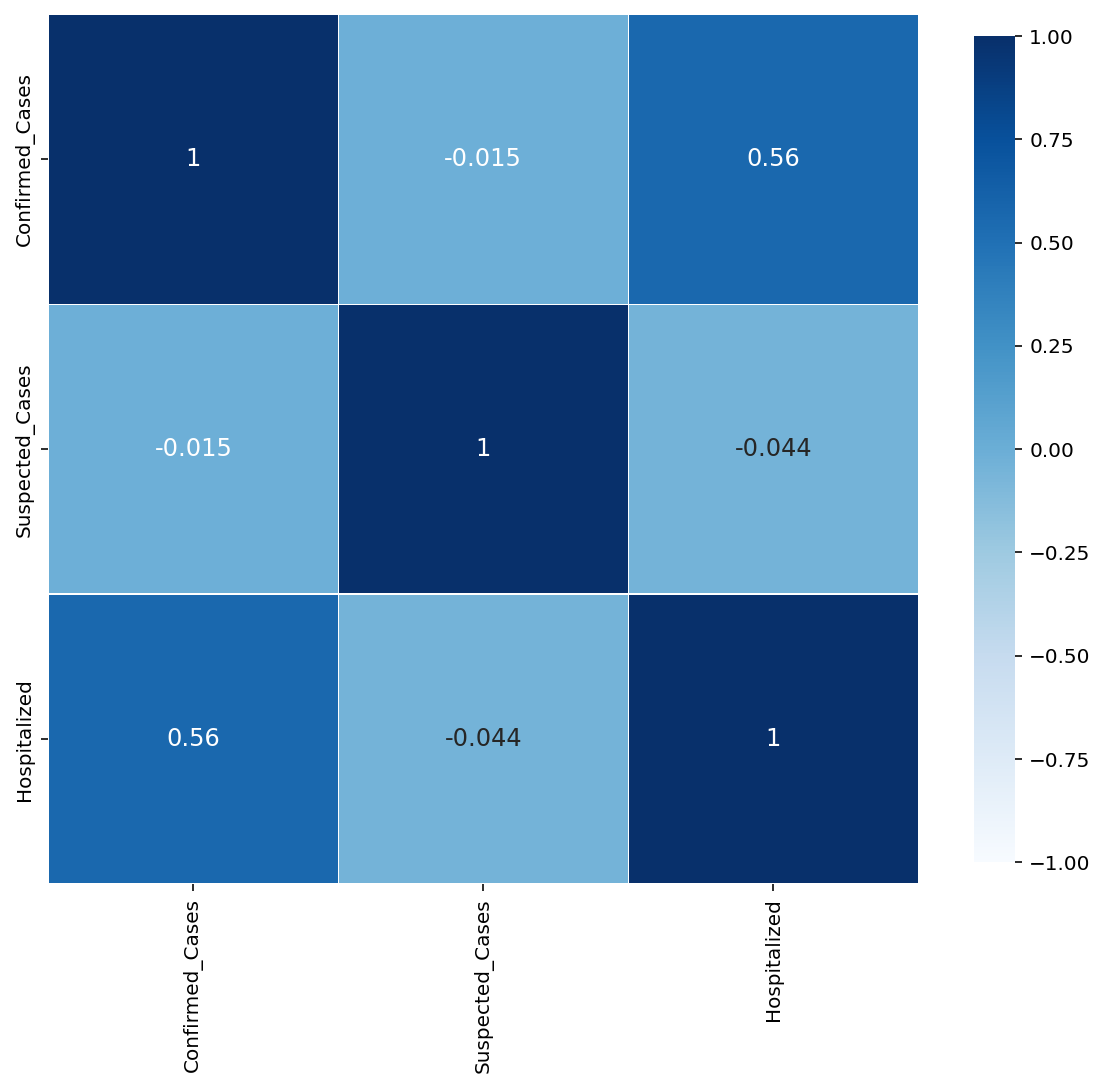

In [ ]:
plt.subplots(figsize =(10, 8))

sns.heatmap(worldwide.drop(columns=["Country","ID","Travel_History_Yes", "Travel_History_No"]).corr(), cmap="Blues", square=True, cbar_kws=dict(shrink =.95), 
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
#plt.title("Pearson Correlation Of Features\n", size=15)
plt.xticks(rotation=90)
plt.show()

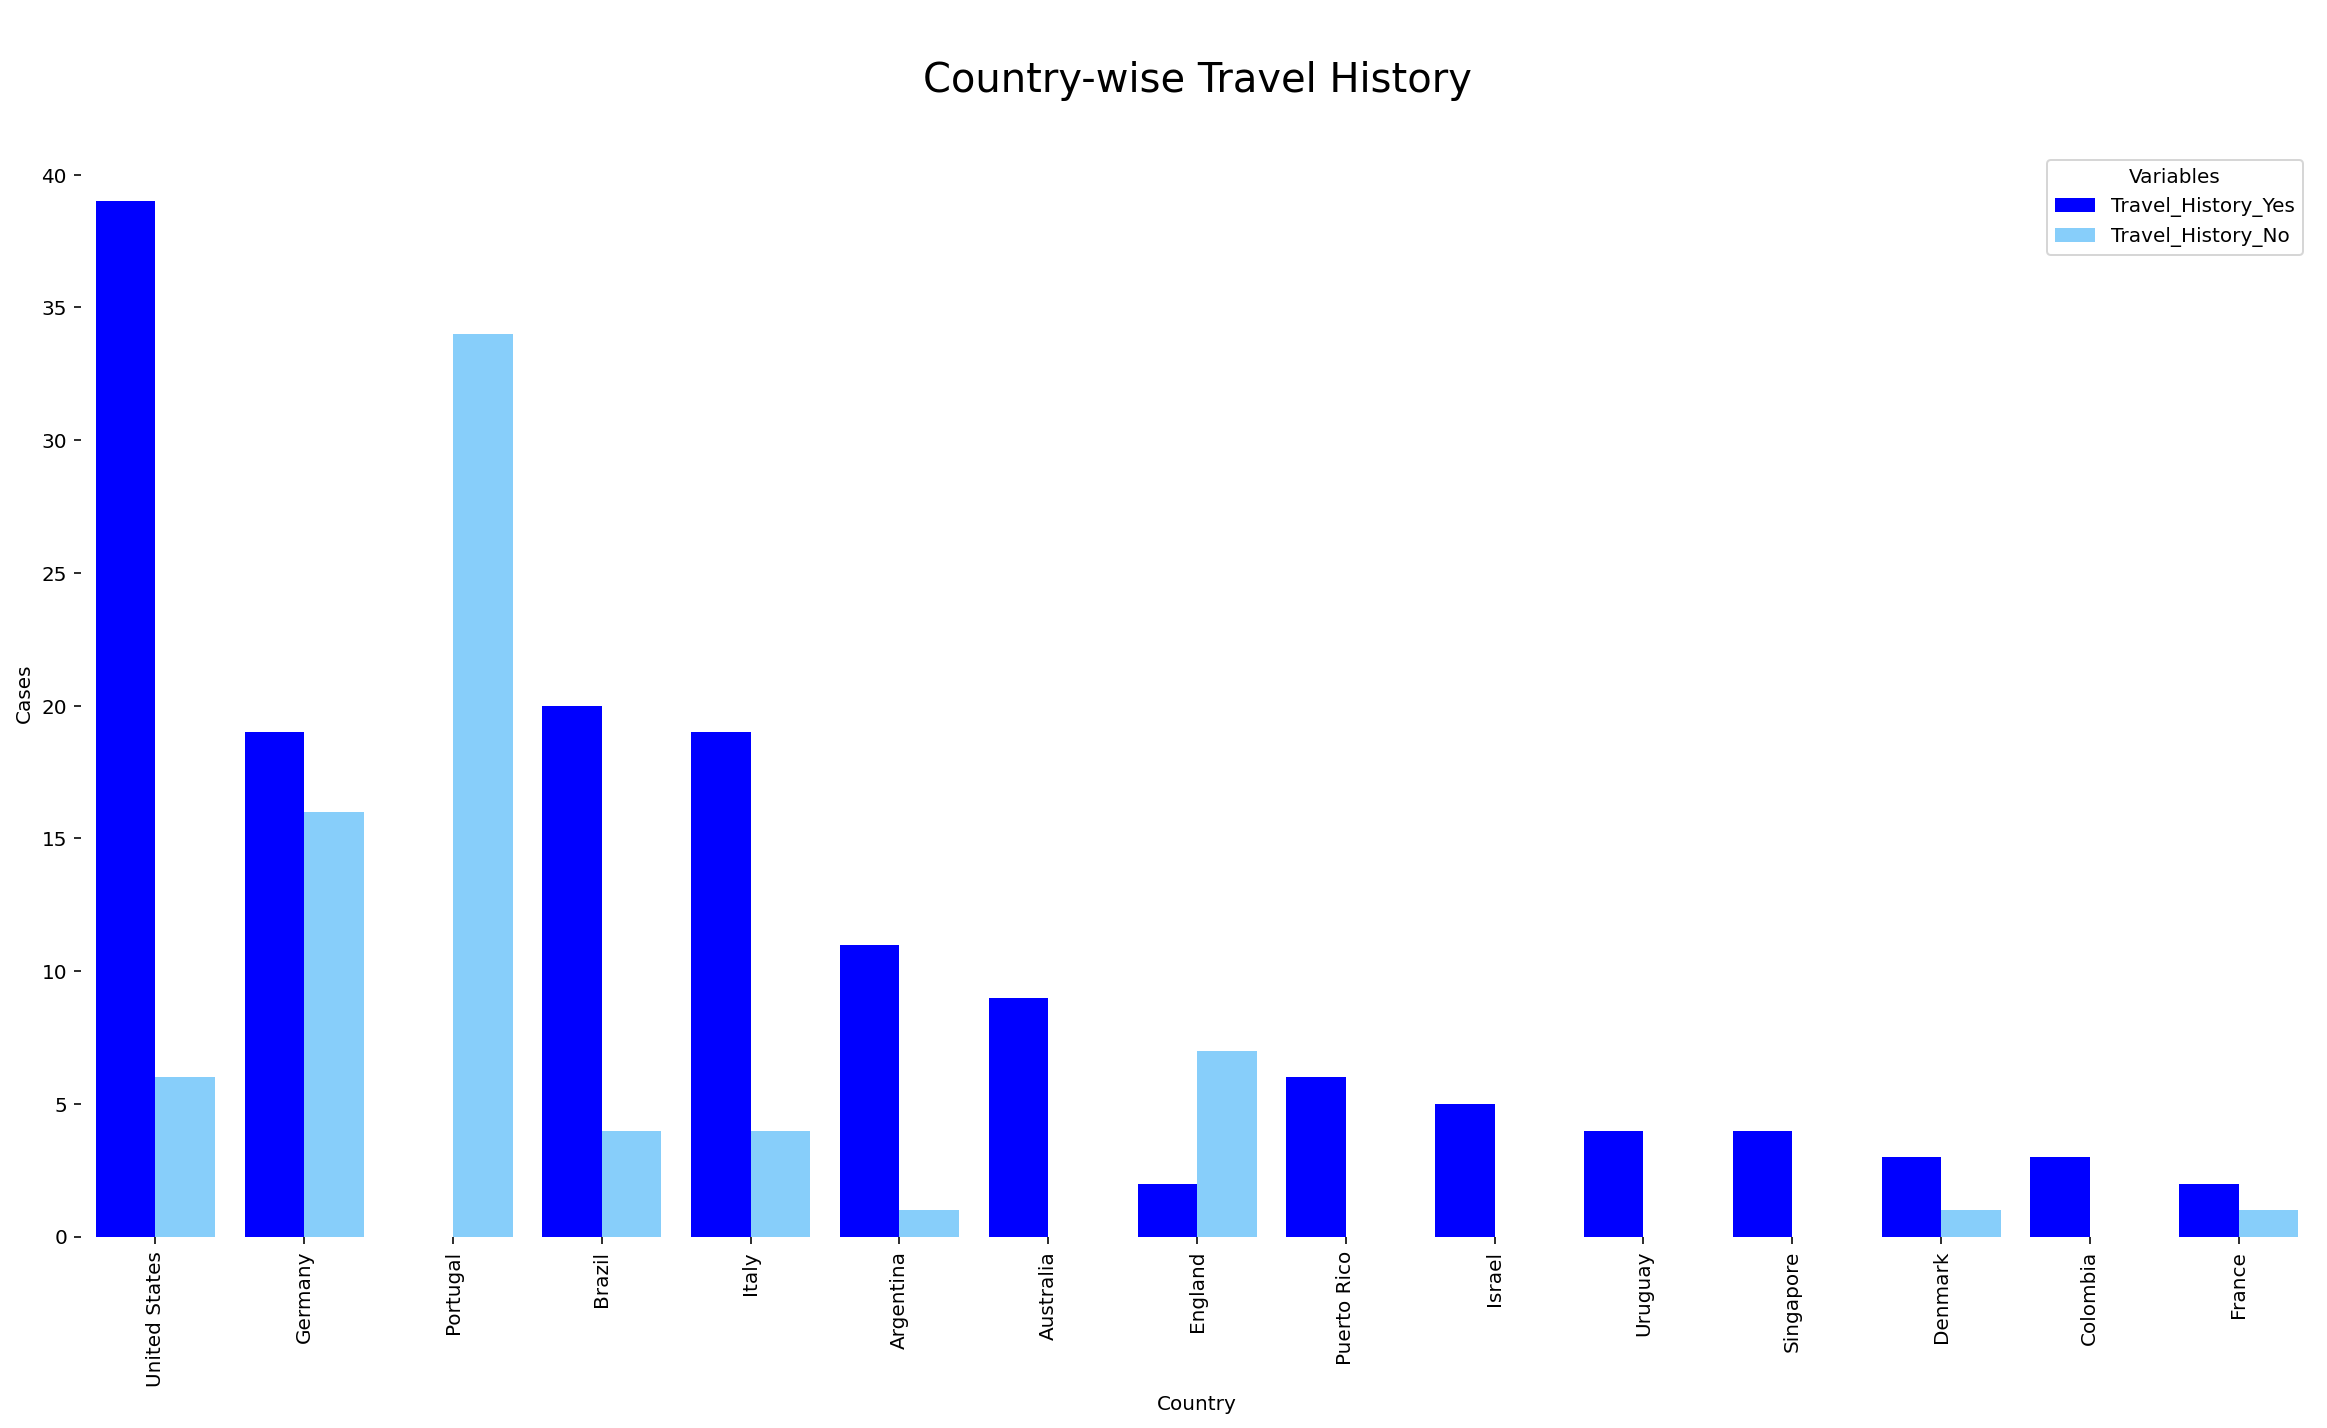

In [ ]:
worldwide["Travel_History"] = worldwide[["Travel_History_Yes","Travel_History_No"]].sum(axis=1)
case_temp5 = worldwide.sort_values(["Travel_History"],ascending=False)[:15]

case_temp5_melt = case_temp5.melt(id_vars=['Country'], value_vars=["Travel_History_Yes","Travel_History_No"],
                  var_name="Variables", value_name="Values")

plt.subplots(figsize=(20,10))
p = sns.barplot(x=case_temp5_melt["Country"],y=case_temp5_melt["Values"],hue=case_temp5_melt["Variables"],palette=["blue","lightskyblue"], saturation=1)
p.axes.set_title("\nCountry-wise Travel History\n",fontsize=20)
plt.xlabel("Country")
plt.ylabel("Cases")
plt.xticks(rotation=90)
# for container in p.containers:
#     p.bar_label(container,label_type="edge",padding=2,size=15,color="black",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

In [ ]:
worldwide['Confirmed_Cases'].sum()


18903.0

In [ ]:
worldwide['Suspected_Cases'].sum()


1654.0

In [ ]:
worldwide['Hospitalized'].sum()

111.0

In [ ]:
#  title="Top 10 Countries with Highest Number of Confirmed Cases",
confirmed_cases = worldwide[['Country','Confirmed_Cases']]

fig = px.bar(confirmed_cases.sort_values('Confirmed_Cases',ascending=False)[:10][::-1],x="Confirmed_Cases",y="Country",
            text='Confirmed_Cases',color_discrete_sequence=px.colors.qualitative.Pastel,
             height=500,width=1200)
fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    )
)
fig.update_yaxes(title = 'Country')
fig.update_xaxes(title = ' Confirmed Cases')
fig.show()

In [ ]:
#  title="Top 10 Countries with Highest Number of Confirmed Cases",
Suspected_Cases = worldwide[['Country','Suspected_Cases']]

fig = px.bar(Suspected_Cases.sort_values('Suspected_Cases',ascending=False)[:10][::-1],x="Suspected_Cases",y="Country",
            text='Suspected_Cases',color_discrete_sequence=px.colors.qualitative.Pastel,
             height=500,width=1200)
fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black', 
                  )

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(

    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    ),
)
fig.update_yaxes(title = 'Country')
fig.update_xaxes(title = ' Suspected Cases')
fig.show()

In [ ]:
#  title="Top 10 Countries with Highest Number of Confirmed Cases",
Hospitalized_Cases = worldwide[['Country','Hospitalized']]

fig = px.bar(Hospitalized_Cases.sort_values('Hospitalized',ascending=False)[:10][::-1],x="Hospitalized",y="Country",
            text='Hospitalized',color_discrete_sequence=px.colors.qualitative.Pastel,
             height=500,width=1200)
fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black', 
                  )

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(

    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    ),
)
fig.update_yaxes(title = 'Country')
fig.update_xaxes(title = ' Hospitalized Cases')
fig.show()

# **Statistical Analysis**

In [ ]:
data_df= pd.read_csv('/content/drive/MyDrive/MonkeyPox/archive/Worldwide_Case_Detection_Timeline.csv')
data_df.head(10)

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
5,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
6,2022-02-28,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2022-03-04,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2022-03-04,Central African Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022-03-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_df.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_df.insert(0, 'ID', range(1, 1 + len(data_df)))

In [ ]:
data_df.head()

,ID,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN
4,5,2022-02-17,Cameroon,NaN,0-39,NaN,NaN,NaN,NaN,NaN


In [ ]:
ts_data = data_df['Date_confirmation'].value_counts()
ts_data.columns = ['Accumulated_Cases']
ts_data.sort_index(inplace=True)
ts_data = pd.DataFrame(ts_data)
ts_data.rename(columns = {'Date_confirmation':'Accumulated_Cases'}, inplace = True)
ts_data



,Accumulated_Cases
2022-01-31,3
2022-02-17,3
2022-02-28,1
2022-03-04,2
2022-03-31,6
...,...
2022-07-22,724
2022-07-23,1
2022-07-24,17
2022-07-25,1113


In [ ]:
ts_data.sum()

Accumulated_Cases    19140
dtype: int64

In [ ]:
avg_returns = ts_data['Accumulated_Cases'].mean()
avg_returns

230.6024096385542

In [ ]:
fig = px.line(ts_data, x=ts_data.index, y="Accumulated_Cases", markers = True, width=700, color_discrete_sequence=px.colors.qualitative.Pastel, template = 'xgridoff',)
fig.update_layout( xaxis_title="Days", yaxis_title="Number of Confirmaed Cases",height=700,width=1200)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    )
)
fig.show()

In [ ]:
ts_data.head()

,Accumulated_Cases
2022-01-31,3
2022-02-17,3
2022-02-28,1
2022-03-04,2
2022-03-31,6


In [ ]:

map_df = data_df[['Date_confirmation','ID']].groupby('Date_confirmation').agg('count').reset_index()
map_df.rename({'ID':'Count'}, axis = 1, inplace = True)
map_df=map_df.loc[map_df['Count'] > 100]

In [ ]:
map_df.head()

,Date_confirmation,Count
25,2022-05-30,123
28,2022-06-02,125
31,2022-06-05,107
32,2022-06-06,115
33,2022-06-07,150


In [ ]:
fig = px.bar(map_df,
             x = 'Date_confirmation',
             y = 'Count',
             text = 'Count',
             color = 'Count',
             opacity = 0.9,
            # title = 'Number of Confirmed Cases of Each Day',
             color_continuous_scale = ['#bbbbbb','#38cae0'],
             template = 'xgridoff',
             hover_data = ['Date_confirmation'],
             color_continuous_midpoint = 0,
             height = 600,
             
            )
fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    )
)

fig.update_yaxes(title = 'Confirmed Cases')
fig.update_xaxes(title = 'Date')

fig.show()

In [ ]:
data_df.Age.unique()

array([nan, '0-39', '20-44', '25-29', '30-34', '20-69', '20-64', '40-44',
       '40-49', '30-39', '20-59', '50-59', '15-74', '30-59', '35-39',
       '45-49', '55-59', '15-39', '30-50', '50-54', '20-24', '15-64',
       '25-49', '22-55', '40-45', '26-54', '30-54', '30-49', '20-29',
       '15-69', '40-42', '20-50', '50-55', '45-50', '35-40', '20-62',
       '34-46', '20-39', '25-34', '35-44', '45-54', '55-64', '60-64',
       '5-9', '36-50', '20-60', '65-69', '19-24', '20-49', '23-46',
       '25-39', '25-53', '15-84', '51-65', '20-54', '20-35', '1-69',
       '15-19', '30-35', '20-46', '20-65', '0-9', '24-29'], dtype=object)

In [ ]:
data_df['Age'] = data_df['Age'].fillna('0')
data_df['Age'] = data_df['Age'].apply(lambda x: np.array(x.split('-'), dtype=int).mean())
data_df['Age'] = np.ceil(data_df['Age']).astype(int)

In [ ]:
data_df.Age.unique()

array([ 0, 20, 32, 27, 45, 42, 35, 40, 55, 37, 47, 57, 52, 22, 39, 43, 25,
       41, 53, 48, 38, 30, 50, 60, 62,  7, 67, 58, 28, 17, 33,  5])

In [ ]:
data_df.Age.value_counts().sort_values(ascending=False)

0     16968
45      785
40      445
42      414
50      190
32       80
35       63
37       42
27       28
43       22
41       16
33       15
30       14
47       10
22        8
39        7
20        6
55        4
52        3
58        3
60        3
28        2
25        2
5         2
38        1
62        1
7         1
67        1
48        1
53        1
17        1
57        1
Name: Age, dtype: int64

In [ ]:

ages_selected = data_df[data_df['Age']>15]
fig = px.histogram(ages_selected,x='Age',nbins=25,color_discrete_sequence = px.colors.qualitative.Pastel, text_auto=True, height = 600, width=600 )


fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    )
)

fig.show()

In [ ]:
data_df['Symptoms'].unique()

array([nan, 'rash', 'vesicular rash', 'skin lesions, ulcerative lesions',
       'ulcerative lesions',
       'Slight swallowing difficulties and an elevated temperature',
       'perianal papules; inguinal adenopathy', 'genital ulcers',
       'lesions', 'genital rash', 'fever, rash',
       'fever, cough, skin lesions', 'oral and genital ulcers, fever',
       'fever, lesions', 'skin lesions', 'blisters', 'pustules, fever',
       'blisters, high fever', 'genital ulcer lesions',
       'fever, muscle pain, rash', 'Fever, skin rashes',
       'Fever, chills, fatigue, headache, skin lesions',
       'cough, chills, muscle pain, pustule-like lesions',
       'fever; myalgia', 'skin lesions, fever',
       'headache, muscle pain, back pain, vasicular rashes',
       'skin lesions, headaches, enlarged lymph nodes, fever',
       'rash on the skin',
       'Spots on skin, vesicuated lesions, skin scabs',
       'papules, itching', 'headache, fever, skin rashes', 'fever; rash',
       'feve

In [ ]:
symptoms = data_df[["Symptoms","Date_confirmation", "ID"]]
symptoms["Symptoms"].replace(np.nan,"NA",inplace = True)
symptoms = symptoms[symptoms["Symptoms"].isin(["NA"]) == False]
symptoms["Symptoms"] = symptoms["Symptoms"].str.split(", | , | ,|;")
symptoms = symptoms.explode("Symptoms")

symptoms.replace(to_replace = [" rash","rash","rashes","vesicular rash","Rashes","rash on the skin","vasicular rashes","rashes in the groin area","rashes typical of Monkeypox","Rashes in the perianal region","skin rashes","Genital rashes","genital rash"], value = "Rash", inplace=True)
symptoms.replace(to_replace = ["headache","headaches"], value = "Headache", inplace=True)
symptoms.replace(to_replace = ["genital ulcers"], value = "oral and genital ulcers", inplace=True)
symptoms.replace(to_replace = ["muscle pain","muscle ache","back pain","body pains"], value = "Muscle Pain", inplace=True)
symptoms.replace(to_replace = ["Swelling","swelling of lymph nodes","enlarged lymph nodes","Slight swallowing difficulties and an elevated temperature"], value = "swollen lymph nodes", inplace=True)
symptoms.replace(to_replace = ["lesions","skin manifestations","isolated skin lesions","lower abdomen skin lesions","Spots on skin","Three lesions typical of monkeypox"], value = "skin lesions", inplace=True)
symptoms.replace(to_replace = ["fever","mild fever","high fever"], value = "Fever", inplace=True)
symptoms.replace(to_replace = ["fatigue"," myalgia","vesicles"," inguinal adenopathy"], value = ["Fatigue","myalgia","Vesicles","inguinal adenopathy"], inplace=True)
symptoms["Symptoms"] = symptoms["Symptoms"].str.title()

# import warnings
# warnings.filterwarnings("ignore")
print(f'Total amount of unique symptoms : {len(symptoms["Symptoms"].unique())}')
print("\nTop 15 unique symptoms and respective occurances are :\n\n")
symptoms["Symptoms"].value_counts()[:15].to_frame().T

Total amount of unique symptoms : 37

Top 15 unique symptoms and respective occurances are :




,Fever,Rash,Genital Ulcer Lesions,Oral And Genital Ulcers,Ulcerative Lesions,Skin Lesions,Headache,Fatigue,Swollen Lymph Nodes,Muscle Pain,Sore Throat,Myalgia,Vesicles,Perianal Rash,Chills
Symptoms,49,41,30,22,21,21,10,6,6,6,3,3,2,2,2


In [ ]:
symptoms.drop(symptoms.index[symptoms['Symptoms'] == 'Na'], inplace=True)

In [ ]:
symptoms.head()

,Symptoms,Date_confirmation,ID
26,Rash,2022-05-06,27
37,Rash,2022-05-12,38
38,Rash,2022-05-13,39
39,Rash,2022-05-15,40
40,Rash,2022-05-15,41


In [ ]:
symptoms['Count'] = symptoms['Symptoms'].map(symptoms['Symptoms'].value_counts())

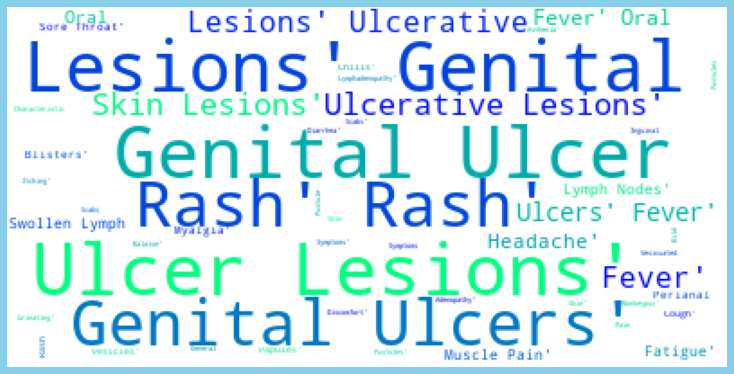

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(
            background_color ="white",colormap="winter",max_font_size=40).generate(str(symptoms["Symptoms"].values))

plt.figure(figsize = (20, 5),facecolor= "skyblue") 
plt.imshow(wordcloud)
plt.axis("off")
plt.margins(x=0, y=0)
plt.tight_layout(pad = 0) 
plt.show()

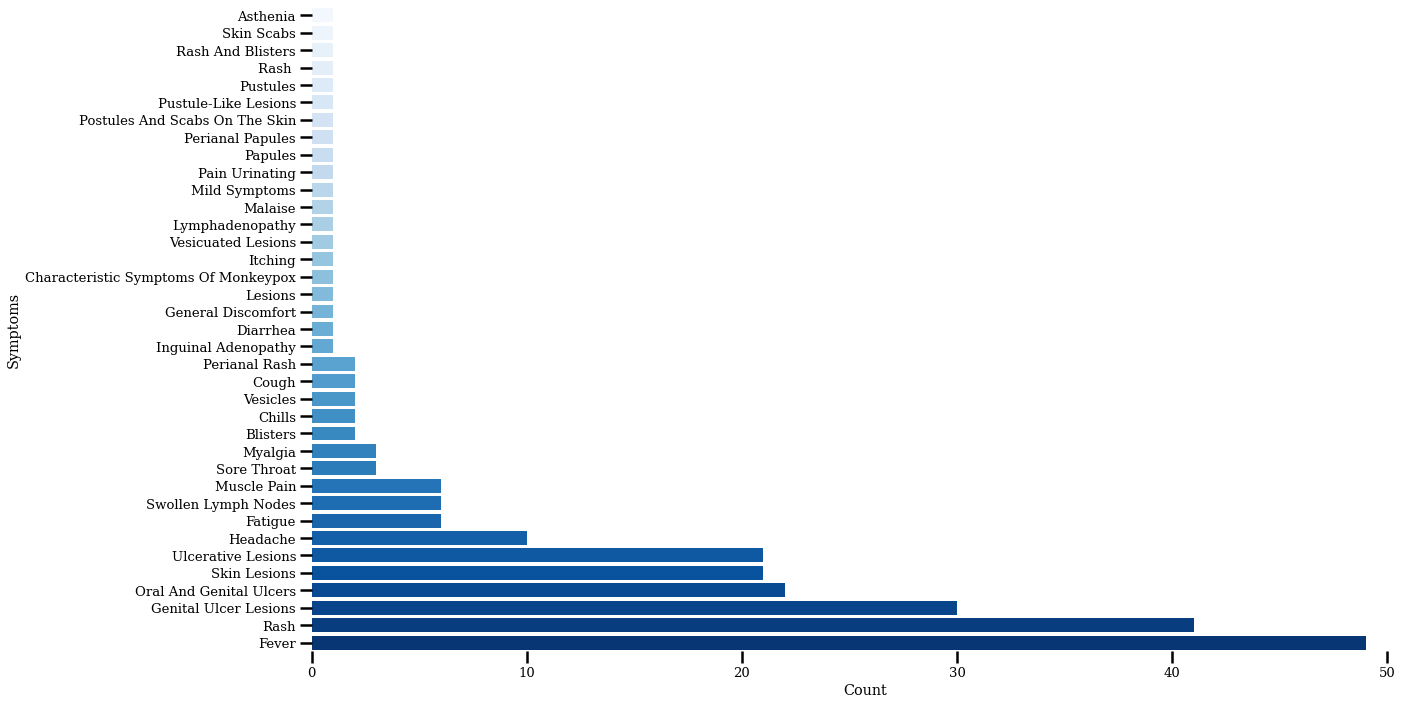

In [ ]:
import seaborn as sns
#sns.set_style("whitegrid")
sns.set_style({'font.family':'serif', 'font.serif':['Times New Roman']})
sns.set_context("poster",font_scale = .6,)
#symptomss=symptoms['Symptoms']
order = symptoms.groupby('Symptoms').mean().sort_values('Count').index
# symptomss['Count'] = symptoms['Symptoms'].map(symptoms['Symptoms'].value_counts())
plt.subplots(figsize=(20,10))
p = sns.barplot(x=symptoms["Count"],y=symptoms["Symptoms"], saturation=1,
                 palette="Blues", order=order, )
#p.axes.set_title("\nSymptoms\n",fontsize=20 )
# for container in p.containers:
#     p.bar_label(container,label_type="edge",padding=2,size=15,color="black",rotation=0)
plt.ylabel("Symptoms")
plt.xticks(rotation=0)

sns.despine(left=True, bottom=True )
plt.tight_layout(pad = 1 ) 
plt.show()



In [ ]:
data_df['Gender'] = data_df['Gender'].str.strip()
data_df['Gender'] = data_df['Gender'].str.lower()

In [ ]:
fig = px.histogram(data_df,y='Gender', nbins=25,color_discrete_sequence = px.colors.qualitative.Pastel, text_auto=True, height = 200, )

fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    )
)
fig.show()

In [ ]:

Gender_df = data_df[['Gender','ID']].groupby('Gender').agg('count').reset_index()
Gender_df['Accumulated Cases'] = Gender_df['ID'].cumsum()
Gender_df.rename({'ID':'Count'}, axis = 1, inplace = True)
fig = px.bar(Gender_df,
             y = 'Gender',
             x = 'Count',
             text = 'Count',
            # color = 'Count',
             #opacity = 0.9,
             #title = 'Number of Confirmed Cases by Travel_history (Y/N/NA)',
             color_continuous_scale = 'skyblue',
             template = 'xgridoff',
             hover_data = ['Count'],
            #  color_continuous_midpoint = 0,
             height = 200, 

            )

fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    )
)

fig.update_yaxes(title = 'Gender')
fig.update_xaxes(title = 'Confirmed Cases ')

fig.show()

In [ ]:
TravelHis_df = data_df[['Travel_history (Y/N/NA)','ID']].groupby('Travel_history (Y/N/NA)').agg('count').reset_index()
TravelHis_df['Accumulated Cases'] = TravelHis_df['ID'].cumsum()
TravelHis_df.rename({'ID':'Count'}, axis = 1, inplace = True)
fig = px.bar(TravelHis_df,
             y = 'Travel_history (Y/N/NA)',
             x = 'Count',
             text = 'Count',
            # color = 'Count',
             #opacity = 0.9,
             #title = 'Number of Confirmed Cases by Travel_history (Y/N/NA)',
             color_continuous_scale = 'skyblue',
             template = 'xgridoff',
             hover_data = ['Count'],
            #  color_continuous_midpoint = 0,
             height = 200, 

            )

fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    )
)

fig.update_yaxes(title = 'Travel history')
fig.update_xaxes(title = 'Confirmed Cases ')

fig.show()

In [ ]:
HospitalisedHis_df = data_df[['Hospitalised (Y/N/NA)','ID']].groupby('Hospitalised (Y/N/NA)').agg('count').reset_index()
HospitalisedHis_df['Accumulated Cases'] = HospitalisedHis_df['ID'].cumsum()
HospitalisedHis_df.rename({'ID':'Count'}, axis = 1, inplace = True)
fig = px.bar(HospitalisedHis_df,
             y = 'Hospitalised (Y/N/NA)',
             x = 'Count',
             text = 'Count',
            # color = 'Count',
             #opacity = 0.9,
             #title = 'Number of Confirmed Cases by Travel_history (Y/N/NA)',
             color_continuous_scale = 'skyblue',
             template = 'xgridoff',
             hover_data = ['Count'],
            #  color_continuous_midpoint = 0,
             height = 200, 

            )

fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    )
)

fig.update_yaxes(title = 'Hospitalised')
fig.update_xaxes(title = 'Confirmed Cases ')

fig.show()

In [ ]:

Isolated_df = data_df[['Isolated (Y/N/NA)','ID']].groupby('Isolated (Y/N/NA)').agg('count').reset_index()
Isolated_df['Accumulated Cases'] = Isolated_df['ID'].cumsum()
Isolated_df.rename({'ID':'Count'}, axis = 1, inplace = True)
fig = px.bar(Isolated_df,
             y = 'Isolated (Y/N/NA)',
             x = 'Count',
             text = 'Count',
            # color = 'Count',
             #opacity = 0.9,
             #title = 'Number of Confirmed Cases by Travel_history (Y/N/NA)',
             color_continuous_scale = 'skyblue',
             template = 'xgridoff',
             hover_data = ['Count'],
            #  color_continuous_midpoint = 0,
             height = 200, 

            )

fig.update_traces(textposition='outside', textfont_size=16,textfont_color='black',
                  )
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.update_layout(
    font=dict(
        family="Times New Roman",
        size=16,
        color="black"
    )
)

fig.update_yaxes(title = 'Isolated')
fig.update_xaxes(title = 'Confirmed Cases ')

fig.show()

# **ML Prediction and Time Series Forecasting**

In [ ]:
!pip install statsmodels --upgrade
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 1.9 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 72 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.3 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638578 sha256=3cffbce62046a719eae66b2600c31e778ad90babafa92da544e647df67c213f0
  Stored in directory: /root/.cache/pip/wheels/c

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import datetime as dt
from datetime import timedelta
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from sklearn.preprocessing import PolynomialFeatures
from fbprophet import Prophet
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima
from pmdarima import auto_arima
std=StandardScaler()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 1.9 MB/s 


In [ ]:
mp_cases_confirmed = pd.read_csv("/content/drive/MyDrive/MonkeyPox/archive/Daily_Country_Wise_Confirmed_Cases.csv")
mp_cases_confirmed.shape

(77, 84)

In [ ]:
mp_cases_confirmed.head(2)

,Country,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,...,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26
0,Nigeria,3,0,1,0,6,0,0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
mp_cases_confirmed.set_index('Country', inplace=True)
mp_cases_confirmed.head(2)

,2022-01-31,2022-02-17,2022-02-28,2022-03-04,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-08,...,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26
Country,,,,,,,,,,,,,,,,,,,,,
Nigeria,3,0,1,0,6,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
Cameroon,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
daily_country_cases = mp_cases_confirmed.T
daily_country_cases.head(2)

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Germany,...,Russia,Bosnia And Herzegovina,India,Saudi Arabia,Martinique,Barbados,Qatar,Costa Rica,Bermuda,Japan
2022-01-31,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
daily_country_cases['Total_cases'] = daily_country_cases.sum(axis=1)
daily_country_cases['Total_cases']

2022-01-31       3
2022-02-17       3
2022-02-28       1
2022-03-04       2
2022-03-31       6
              ... 
2022-07-22     719
2022-07-23       1
2022-07-24      17
2022-07-25    1113
2022-07-26     803
Name: Total_cases, Length: 83, dtype: int64

In [ ]:
# Setting index format as datetime in order to allow manipulation of date/time for time-series analysis
daily_country_cases.index = pd.to_datetime(daily_country_cases.index)

In [ ]:
daily_country_cases.head(2)

Country,Nigeria,Cameroon,Central African Republic,Republic of Congo,England,Democratic Republic Of The Congo,Portugal,Spain,United States,Germany,...,Bosnia And Herzegovina,India,Saudi Arabia,Martinique,Barbados,Qatar,Costa Rica,Bermuda,Japan,Total_cases
2022-01-31,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2022-02-17,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
fig = px.line(daily_country_cases, y='Total_cases',labels={'Total_cases':'Total Cases','index':'Date'},
              title='Monkey Pox Cases Reported Daily Over Time',color_discrete_sequence=['#6F2DBD'], markers=True)
fig.update_layout(hovermode="x")
fig.show()

 ***Prediction***

In [ ]:
datewise=pd.DataFrame(daily_country_cases['Total_cases'])

In [ ]:
datewise["Days Since"]=datewise.index-datewise.index[0]
datewise["Days Since"]=datewise["Days Since"].dt.days

In [ ]:
datewise.head

<bound method NDFrame.head of             Total_cases  Days Since
2022-01-31            3           0
2022-02-17            3          17
2022-02-28            1          28
2022-03-04            2          32
2022-03-31            6          59
...                 ...         ...
2022-07-22          719         172
2022-07-23            1         173
2022-07-24           17         174
2022-07-25         1113         175
2022-07-26          803         176

[83 rows x 2 columns]>

# **Machine Learning**

In [ ]:
train_ml=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid_ml=datewise.iloc[int(datewise.shape[0]*0.95):]

In [ ]:
print(train_ml.shape, valid_ml.shape)

(78, 2) (5, 2)


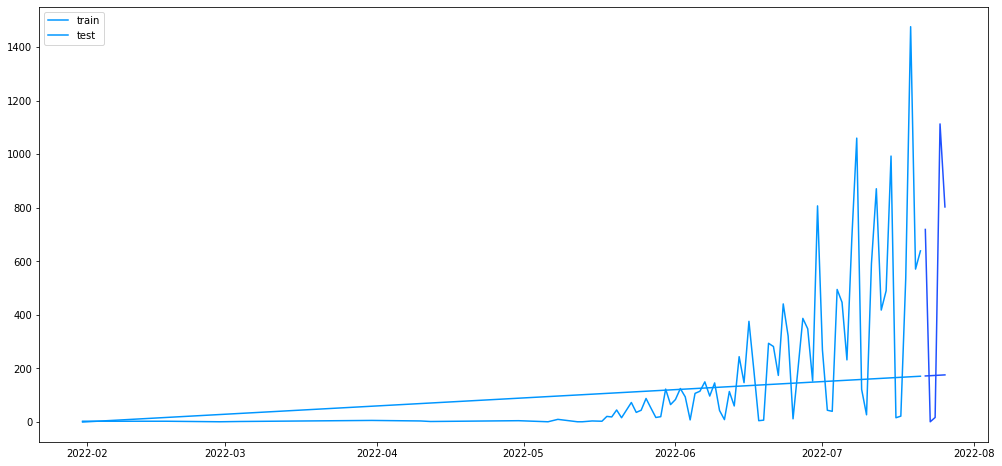

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(17,8))
plt.plot(train_ml, label='train_ml', color='#0096FF',)
plt.plot(valid_ml, label='valid_ml',color='#1F51FF',)

plt.legend(['train', 'test'], loc='upper left')

# **Polynomial Regression**

In [ ]:
poly = PolynomialFeatures(degree = 8) 

In [ ]:
train_poly=poly.fit_transform(np.array(train_ml["Days Since"]).reshape(-1,1))
valid_poly=poly.fit_transform(np.array(valid_ml["Days Since"]).reshape(-1,1))
y=train_ml["Total_cases"]

In [ ]:
linreg=LinearRegression(normalize=True)
linreg.fit(train_poly,y)

LinearRegression(normalize=True)

In [ ]:
prediction_poly=linreg.predict(valid_poly)
model_scores = []
# calculate matrics
rmse_poly=np.sqrt(mean_squared_error(valid_ml["Total_cases"],prediction_poly))
model_scores.append(rmse_poly)

mse_poly = mean_squared_error(valid_ml["Total_cases"],prediction_poly)
model_scores.append(mse_poly)

mae_poly = mean_absolute_error(valid_ml["Total_cases"],prediction_poly)
model_scores.append(mae_poly)

mape_poly = mean_absolute_percentage_error(valid_ml["Total_cases"],prediction_poly) 
model_scores.append(mape_poly)

r2_score_poly = r2_score(valid_ml["Total_cases"],prediction_poly) 
model_scores.append(r2_score_poly)
print("Root Mean Squared Error for Polynomial Regression: ",rmse_poly)
print("Mean Squared Error for Polynomial Regression: ",mse_poly)
print("Mean Absolute Error for Polynomial Regression: ",mae_poly)
print("Mean Absolute Percentage Error for Polynomial Regression: ",mape_poly)
print("R2 Score for Polynomial Regression: ", r2_score_poly)

Root Mean Squared Error for Polynomial Regression:  524.832387895107
Mean Squared Error for Polynomial Regression:  275449.03538368
Mean Absolute Error for Polynomial Regression:  402.9006466976367
Mean Absolute Percentage Error for Polynomial Regression:  168.64379639511748
R2 Score for Polynomial Regression:  -0.3867482855697526


In [ ]:
# creating a list of index names
index_values = ['Root Mean Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error','R2 Score']
   
# creating a list of column names
column_values = ['Polynomial Regression']
  
# creating the dataframe
df = pd.DataFrame(data = model_scores, 
                  index = index_values, 
                  columns = column_values)
  
# displaying the dataframe
# print(df)
df = df.T
pd.options.display.float_format = '{:,.2f}'.format
df

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
Polynomial Regression,524.83,"275,449.04",402.90,168.64,-0.39


In [ ]:
comp_data=poly.fit_transform(np.array(datewise["Days Since"]).reshape(-1,1))
plt.figure(figsize=(11,6))
predictions_poly=linreg.predict(comp_data)

fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=predictions_poly,
                    mode='lines',name="Polynomial Regression Best Fit",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Polynomial Regression Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",
                 legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
model_predictions=pd.DataFrame()
model_predictions["Date"]=valid_ml.index
df_poly=pd.DataFrame(prediction_poly)
df_poly=df_poly.astype(int)
model_predictions["Polynomial Regression"]=df_poly
model_predictions.head()

,Date,Polynomial Regression
0,2022-07-22,755
1,2022-07-23,795
2,2022-07-24,838
3,2022-07-25,885
4,2022-07-26,937


# **SVR**

In [ ]:
svm=SVR(C=1,degree=6,kernel='poly',epsilon=0.01)

In [ ]:
svm.fit(np.array(train_ml["Days Since"]).reshape(-1,1),np.array(train_ml["Total_cases"]).reshape(-1,1))

SVR(C=1, degree=6, epsilon=0.01, kernel='poly')

In [ ]:
prediction_valid_svm=svm.predict(np.array(valid_ml["Days Since"]).reshape(-1,1))

In [ ]:
# calculate matrics
model_scores1=[]
rmse_svr=np.sqrt(mean_squared_error(valid_ml["Total_cases"],prediction_valid_svm))
model_scores1.append(rmse_svr)

mse_svr= mean_squared_error(valid_ml["Total_cases"],prediction_valid_svm)
model_scores1.append(mse_svr)

mae_svr= mean_absolute_error(valid_ml["Total_cases"],prediction_valid_svm)
model_scores1.append(mae_svr)

mape_svr= mean_absolute_percentage_error(valid_ml["Total_cases"],prediction_valid_svm) 
model_scores1.append(mape_svr)

r2_score_svr= r2_score(valid_ml["Total_cases"],prediction_valid_svm) 
model_scores1.append(r2_score_svr)

print("Root Mean Squared Error for SVR: ",rmse_svr)
print("Mean Squared Error for SVR: ",mse_svr)
print("Mean Absolute Error for SVR: ",mae_svr)
print("Mean Absolute Percentage Error for SVR: ",mape_svr)
print("R2 Score for SVR: ", r2_score_svr)

Root Mean Squared Error for SVR:  466.7946881386954
Mean Squared Error for SVR:  217897.2808745019
Mean Absolute Error for SVR:  371.8494654501359
Mean Absolute Percentage Error for SVR:  144.29757485376814
R2 Score for SVR:  -0.09700395306205323


In [ ]:
# creating a list of index names
index_values = ['Root Mean Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error','R2 Score']
   
# creating a list of column names
column_values = ['SVR']
  
# creating the dataframe
df1 = pd.DataFrame(data = model_scores1, 
                  index = index_values, 
                  columns = column_values)
  
# displaying the dataframe
# print(df)
df1 = df1.T
#concate dataframe
data = [df, df1]
df2 = pd.concat(data)
pd.options.display.float_format = '{:,.2f}'.format
df2

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
Polynomial Regression,524.83,"275,449.04",402.90,168.64,-0.39
SVR,466.79,"217,897.28",371.85,144.30,-0.10


In [ ]:
plt.figure(figsize=(11,6))
prediction_svm=svm.predict(np.array(datewise["Days Since"]).reshape(-1,1))
fig=go.Figure()
fig.add_trace(go.Scatter(x=datewise.index, y=datewise["Total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=datewise.index, y=prediction_svm,
                    mode='lines',name="Support Vector Machine Best fit Kernel",
                    line=dict(color='black', dash='dot')))
fig.update_layout(title="Confirmed Cases Support Vectore Machine Regressor Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

<Figure size 792x432 with 0 Axes>

In [ ]:
df_svr= pd.DataFrame(prediction_valid_svm)
model_predictions["SVR"]=df_svr
model_predictions["SVR"]=model_predictions["SVR"].astype(int)
model_predictions.head()

,Date,Polynomial Regression,SVR
0,2022-07-22,755,657
1,2022-07-23,795,681
2,2022-07-24,838,705
3,2022-07-25,885,730
4,2022-07-26,937,756


# **Time Series**

In [ ]:
model_train=datewise.iloc[:int(datewise.shape[0]*0.95)]
valid=datewise.iloc[int(datewise.shape[0]*0.95):]
y_pred=valid.copy()

# **Holt's Linear Model**

In [ ]:
holt=Holt(np.asarray(model_train["Total_cases"])).fit(smoothing_level=0.4, smoothing_slope=0.4,optimized=False)  

In [ ]:
prediction_valid_holt=holt.forecast(len(valid))
model_scores2=[]
# calculate matrics
rmse_holt=np.sqrt(mean_squared_error(valid_ml["Total_cases"],prediction_valid_holt))
model_scores2.append(rmse_holt)

mse_holt= mean_squared_error(valid_ml["Total_cases"],prediction_valid_holt)
model_scores2.append(mse_holt)

mae_holt= mean_absolute_error(valid_ml["Total_cases"],prediction_valid_holt)
model_scores2.append(mae_holt)

mape_holt= mean_absolute_percentage_error(valid_ml["Total_cases"],prediction_valid_holt) 
model_scores2.append(mape_holt)

r2_score_holt= r2_score(valid_ml["Total_cases"],prediction_valid_holt) 
model_scores2.append(r2_score_holt)

print("Root Mean Squared Error for Holt's Linear Model: ",rmse_holt)
print("Mean Squared Error for Holt's Linear Model: ",mse_holt)
print("Mean Absolute Error for Holt's Linear Model: ",mae_holt)
print("Mean Absolute Percentage Error for Holt's Linear Model: ",mape_holt)
print("R2 Score for Holt's Linear Model: ", r2_score_holt)

Root Mean Squared Error for Holt's Linear Model:  584.2745617123752
Mean Squared Error for Holt's Linear Model:  341376.7634641881
Mean Absolute Error for Holt's Linear Model:  454.13850321319313
Mean Absolute Percentage Error for Holt's Linear Model:  186.7653368719046
R2 Score for Holt's Linear Model:  -0.7186614605779895


In [ ]:
# creating a list of index names
index_values = ['Root Mean Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error','R2 Score']
   
# creating a list of column names
column_values = ['Holts Linear Model']
  
# creating the dataframe
df3 = pd.DataFrame(data = model_scores2, 
                  index = index_values, 
                  columns = column_values)
  
# displaying the dataframe
# print(df)
df3 = df3.T
#concate dataframe
data = [df2, df3]
df4 = pd.concat(data)
model_predictions["SVR"]
df4

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
Polynomial Regression,524.83,"275,449.04",402.90,168.64,-0.39
SVR,466.79,"217,897.28",371.85,144.30,-0.10
Holts Linear Model,584.27,"341,376.76",454.14,186.77,-0.72


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Total_cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=prediction_valid_holt,
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Linear Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
df_holt= pd.DataFrame(prediction_valid_holt)
model_predictions["Holt's Linear Model"]=df_holt
model_predictions["Holt's Linear Model"]=model_predictions["Holt's Linear Model"].astype(int)
model_predictions.head()

,Date,Polynomial Regression,SVR,Holt's Linear Model
0,2022-07-22,755,657,822
1,2022-07-23,795,681,880
2,2022-07-24,838,705,937
3,2022-07-25,885,730,994
4,2022-07-26,937,756,1052


# **Holt's Winter Model**

In [ ]:
es=ExponentialSmoothing(np.asarray(model_train['Total_cases']),seasonal_periods=14,trend='add', seasonal='mul').fit()

In [ ]:
prediction_valid_holt_winter=es.forecast(len(valid))
model_scores3=[]
# calculate matrics
rmse_holt_winter=np.sqrt(mean_squared_error(valid_ml["Total_cases"],prediction_valid_holt_winter))
model_scores3.append(rmse_holt_winter)

mse_holt_winter= mean_squared_error(valid_ml["Total_cases"],prediction_valid_holt_winter)
model_scores3.append(mse_holt_winter)

mae_holt_winter= mean_absolute_error(valid_ml["Total_cases"],prediction_valid_holt_winter)
model_scores3.append(mae_holt_winter)

mape_holt_winter= mean_absolute_percentage_error(valid_ml["Total_cases"],prediction_valid_holt_winter) 
model_scores3.append(mape_holt_winter)

r2_score_holt_winter= r2_score(valid_ml["Total_cases"],prediction_valid_holt_winter) 
model_scores3.append(r2_score_holt_winter)

print("Root Mean Squared Error for Holt's Winter Model: ",rmse_holt_winter)
print("Mean Squared Error for Holt's Winter Model: ",mse_holt_winter)
print("Mean Absolute Error for Holt's Winter Model: ",mae_holt_winter)
print("Mean Absolute Percentage Error for Holt's Winter Model: ",mape_holt_winter)
print("R2 Score for Holt's Winter Model: ", r2_score_holt_winter)

Root Mean Squared Error for Holt's Winter Model:  278.2953791200176
Mean Squared Error for Holt's Winter Model:  77448.31803955433
Mean Absolute Error for Holt's Winter Model:  249.80650163201227
Mean Absolute Percentage Error for Holt's Winter Model:  25.43169408335211
R2 Score for Holt's Winter Model:  0.6100864099523498


In [ ]:
# creating a list of index names
index_values = ['Root Mean Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error','R2 Score']
   
# creating a list of column names
column_values = ['Holts Winter Model']
  
# creating the dataframe
df5 = pd.DataFrame(data = model_scores3, 
                  index = index_values, 
                  columns = column_values)
  
# displaying the dataframe
# print(df)
df5 = df5.T
#concate dataframe
data = [df4, df5]
df6 = pd.concat(data)
pd.options.display.float_format = '{:,.2f}'.format
df6

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
Polynomial Regression,524.83,"275,449.04",402.90,168.64,-0.39
SVR,466.79,"217,897.28",371.85,144.30,-0.10
Holts Linear Model,584.27,"341,376.76",454.14,186.77,-0.72
Holts Winter Model,278.30,"77,448.32",249.81,25.43,0.61


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Total_cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=prediction_valid_holt_winter,
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases Holt's Winter Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
df_holt_winter= pd.DataFrame(prediction_valid_holt_winter)
model_predictions["Holt's Winter Model"]=df_holt_winter
model_predictions["Holt's Winter Model"]=model_predictions["Holt's Winter Model"].astype(int)
model_predictions.head()

,Date,Polynomial Regression,SVR,Holt's Linear Model,Holt's Winter Model
0,2022-07-22,755,657,822,1075
1,2022-07-23,795,681,880,114
2,2022-07-24,838,705,937,228
3,2022-07-25,885,730,994,685
4,2022-07-26,937,756,1052,942


# **AR Model**

In [ ]:
model_ar= auto_arima(model_train["Total_cases"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=4,max_q=0,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(model_train["Total_cases"])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1097.911, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1095.133, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1064.464, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1053.498, Time=0.14 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=1052.958, Time=0.18 sec

Best model:  ARIMA(4,1,0)(0,0,0)[0] intercept
Total fit time: 0.487 seconds


ARIMA(order=(4, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
prediction_ar=model_ar.predict(len(valid))
model_scores4=[]
# calculate matrics
rmse_ar=np.sqrt(mean_squared_error(valid_ml["Total_cases"],prediction_ar))
model_scores4.append(rmse_ar)

mse_ar= mean_squared_error(valid_ml["Total_cases"],prediction_ar)
model_scores4.append(mse_ar)

mae_ar= mean_absolute_error(valid_ml["Total_cases"],prediction_ar)
model_scores4.append(mae_ar)

mape_ar= mean_absolute_percentage_error(valid_ml["Total_cases"],prediction_ar) 
model_scores4.append(mape_ar)

r2_score_ar= r2_score(valid_ml["Total_cases"],prediction_ar) 
model_scores4.append(r2_score_ar)

print("Root Mean Squared Error for AR Model: ",rmse_ar)
print("Mean Squared Error for AR Model: ",mse_ar)
print("Mean Absolute Error for AR Model: ",mae_ar)
print("Mean Absolute Percentage Error for AR Model: ",mape_ar)
print("R2 Score for AR Model: ", r2_score_ar)

Root Mean Squared Error for AR Model:  683.6507688429582
Mean Squared Error for AR Model:  467378.37373956793
Mean Absolute Error for AR Model:  568.3604994769136
Mean Absolute Percentage Error for AR Model:  260.18605893922324
R2 Score for AR Model:  -1.3530166209982166


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
# creating a list of index names
index_values = ['Root Mean Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error','R2 Score']
   
# creating a list of column names
column_values = ['AR Model']
  
# creating the dataframe
df7 = pd.DataFrame(data = model_scores4, 
                  index = index_values, 
                  columns = column_values)
  
# displaying the dataframe
# print(df)
df7 = df7.T
#concate dataframe
data = [df6, df7]
df8 = pd.concat(data)
pd.options.display.float_format = '{:,.2f}'.format
df8

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
Polynomial Regression,524.83,"275,449.04",402.90,168.64,-0.39
SVR,466.79,"217,897.28",371.85,144.30,-0.10
Holts Linear Model,584.27,"341,376.76",454.14,186.77,-0.72
Holts Winter Model,278.30,"77,448.32",249.81,25.43,0.61
AR Model,683.65,"467,378.37",568.36,260.19,-1.35


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Total_cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=prediction_ar,
                    mode='lines+markers',name="Prediction of Confirmed Cases",))
fig.update_layout(title="Confirmed Cases AR Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
prediction_ar.index = pd.RangeIndex(len(model_predictions)) #change the index as model_predictions
model_predictions["AR Model"]=prediction_ar
model_predictions["AR Model"]=model_predictions["AR Model"].astype(int)
model_predictions.head()

,Date,Polynomial Regression,SVR,Holt's Linear Model,Holt's Winter Model,AR Model
0,2022-07-22,755,657,822,1075,986
1,2022-07-23,795,681,880,114,1259
2,2022-07-24,838,705,937,228,717
3,2022-07-25,885,730,994,685,782
4,2022-07-26,937,756,1052,942,1087


# **MA Model**

In [ ]:
model_ma= auto_arima(model_train["Total_cases"],trace=True, error_action='ignore', start_p=0,start_q=0,max_p=0,max_q=2,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_ma.fit(model_train["Total_cases"])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1097.911, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.322 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [ ]:
prediction_ma=model_ma.predict(len(valid))
model_scores5=[]
# calculate matrics
rmse_ma=np.sqrt(mean_squared_error(valid_ml["Total_cases"],prediction_ma))
model_scores5.append(rmse_ma)

mse_ma= mean_squared_error(valid_ml["Total_cases"],prediction_ma)
model_scores5.append(mse_ma)

mae_ma= mean_absolute_error(valid_ml["Total_cases"],prediction_ma)
model_scores5.append(mae_ma)

mape_ma= mean_absolute_percentage_error(valid_ml["Total_cases"],prediction_ma) 
model_scores5.append(mape_ma)

r2_score_ma= r2_score(valid_ml["Total_cases"],prediction_ma) 
model_scores5.append(r2_score_ma)

print("Root Mean Squared Error for MA Model: ",rmse_ma)
print("Mean Squared Error for MA Model: ",mse_ma)
print("Mean Absolute Error for MA Model: ",mae_ma)
print("Mean Absolute Percentage Error for MA Model: ",mape_ma)
print("R2 Score for MA Model: ", r2_score_ma)

Root Mean Squared Error for MA Model:  460.731596976689
Mean Squared Error for MA Model:  212273.6044526902
Mean Absolute Error for MA Model:  387.34025974025974
Mean Absolute Percentage Error for MA Model:  138.64281797707443
R2 Score for MA Model:  -0.06869155172914043


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
# creating a list of index names
index_values = ['Root Mean Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error','R2 Score']
   
# creating a list of column names
column_values = ['MA Model']
  
# creating the dataframe
df9 = pd.DataFrame(data = model_scores5, 
                  index = index_values, 
                  columns = column_values)
  
# displaying the dataframe
# print(df)
df9 = df9.T
#concate dataframe
data = [df8, df9]
df10 = pd.concat(data)
pd.options.display.float_format = '{:,.2f}'.format
df10

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
Polynomial Regression,524.83,"275,449.04",402.90,168.64,-0.39
SVR,466.79,"217,897.28",371.85,144.30,-0.10
Holts Linear Model,584.27,"341,376.76",454.14,186.77,-0.72
Holts Winter Model,278.30,"77,448.32",249.81,25.43,0.61
AR Model,683.65,"467,378.37",568.36,260.19,-1.35
MA Model,460.73,"212,273.60",387.34,138.64,-0.07


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Total_cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=prediction_ma,
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases MA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
prediction_ma.index = pd.RangeIndex(len(model_predictions)) #change the index as model_predictions
model_predictions["MA Model"]=prediction_ma
model_predictions["MA Model"]=model_predictions["MA Model"].astype(int)
model_predictions.head()

,Date,Polynomial Regression,SVR,Holt's Linear Model,Holt's Winter Model,AR Model,MA Model
0,2022-07-22,755,657,822,1075,986,647
1,2022-07-23,795,681,880,114,1259,655
2,2022-07-24,838,705,937,228,717,663
3,2022-07-25,885,730,994,685,782,672
4,2022-07-26,937,756,1052,942,1087,680


# **ARIMA Model**

In [ ]:
model_arima= auto_arima(model_train["Total_cases"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
                   suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Total_cases"])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1097.911, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.17 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=1041.661, Time=0.32 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1095.133, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1064.464, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1043.626, Time=0.21 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1037.418, Time=0.40 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1036.817, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=1053.498, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1045.287, Time=0.30 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1043.919, Time=0.33 sec

Best model:  ARIMA(2,1,3)(0,0,0)[0

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True)

In [ ]:
prediction_arima=model_arima.predict(len(valid))
model_scores6=[]
# calculate matrics
rmse_arima=np.sqrt(mean_squared_error(valid_ml["Total_cases"],prediction_arima))
model_scores6.append(rmse_arima)

mse_arima= mean_squared_error(valid_ml["Total_cases"],prediction_arima)
model_scores6.append(mse_arima)

mae_arima= mean_absolute_error(valid_ml["Total_cases"],prediction_arima)
model_scores6.append(mae_arima)

mape_arima= mean_absolute_percentage_error(valid_ml["Total_cases"],prediction_arima) 
model_scores6.append(mape_arima)

r2_score_arima= r2_score(valid_ml["Total_cases"],prediction_arima) 
model_scores6.append(r2_score_arima)

print("Root Mean Squared Error for ARIMA Model: ",rmse_arima)
print("Mean Squared Error for ARIMA Model: ",mse_arima)
print("Mean Absolute Error for ARIMA Model: ",mae_arima)
print("Mean Absolute Percentage Error for ARIMA Model: ",mape_arima)
print("R2 Score for ARIMA Model: ", r2_score_arima)

Root Mean Squared Error for ARIMA Model:  603.9692503034403
Mean Squared Error for ARIMA Model:  364778.85531209974
Mean Absolute Error for ARIMA Model:  541.1391609015147
Mean Absolute Percentage Error for ARIMA Model:  215.81159725365077
R2 Score for ARIMA Model:  -0.8364793019207009


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
# creating a list of index names
index_values = ['Root Mean Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error','R2 Score']
   
# creating a list of column names
column_values = ['ARIMA Model']
  
# creating the dataframe
df11 = pd.DataFrame(data = model_scores6, 
                  index = index_values, 
                  columns = column_values)
  
# displaying the dataframe
# print(df)
df11 = df11.T
#concate dataframe
data = [df10, df11]
df12 = pd.concat(data)
pd.options.display.float_format = '{:,.2f}'.format
df12

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
Polynomial Regression,524.83,"275,449.04",402.90,168.64,-0.39
SVR,466.79,"217,897.28",371.85,144.30,-0.10
Holts Linear Model,584.27,"341,376.76",454.14,186.77,-0.72
Holts Winter Model,278.30,"77,448.32",249.81,25.43,0.61
AR Model,683.65,"467,378.37",568.36,260.19,-1.35
MA Model,460.73,"212,273.60",387.34,138.64,-0.07
ARIMA Model,603.97,"364,778.86",541.14,215.81,-0.84


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Total_cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=prediction_arima,
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases ARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
prediction_arima.index = pd.RangeIndex(len(model_predictions)) #change the index as model_predictions
model_predictions["ARIMA Model"]=prediction_arima
model_predictions["ARIMA Model"]=model_predictions["ARIMA Model"].astype(int)
model_predictions.head()

,Date,Polynomial Regression,SVR,Holt's Linear Model,Holt's Winter Model,AR Model,MA Model,ARIMA Model
0,2022-07-22,755,657,822,1075,986,647,1105
1,2022-07-23,795,681,880,114,1259,655,1047
2,2022-07-24,838,705,937,228,717,663,545
3,2022-07-25,885,730,994,685,782,672,848
4,2022-07-26,937,756,1052,942,1087,680,1282


# **SARIMA Model**

In [ ]:
model_sarima= auto_arima(model_train["Total_cases"],trace=True, error_action='ignore', 
                         start_p=0,start_q=0,max_p=2,max_q=2,m=7,
                   suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(model_train["Total_cases"])

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[7]             : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=951.823, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=934.990, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=907.958, Time=0.23 sec
 ARIMA(0,1,1)(0,1,0)[7]             : AIC=905.962, Time=0.08 sec
 ARIMA(0,1,1)(1,1,0)[7]             : AIC=907.958, Time=0.16 sec
 ARIMA(0,1,1)(1,1,1)[7]             : AIC=909.658, Time=0.32 sec
 ARIMA(1,1,1)(0,1,0)[7]             : AIC=907.647, Time=0.14 sec
 ARIMA(0,1,2)(0,1,0)[7]             : AIC=907.581, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=933.857, Time=0.03 sec
 ARIMA(1,1,2)(0,1,0)[7]             : AIC=908.440, Time=0.32 sec
 ARIMA(0,1,1)(0,1,0)[7] intercept   : AIC=inf, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,1,0)[7]          
Total fit time: 2.060 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(0, 1, 0, 7),
      suppress_warnings=True, with_intercept=False)

In [ ]:
prediction_sarima=model_sarima.predict(len(valid))
model_scores7=[]
# calculate matrics
rmse_sarima=np.sqrt(mean_squared_error(valid_ml["Total_cases"],prediction_sarima))
model_scores7.append(rmse_sarima)

mse_sarima= mean_squared_error(valid_ml["Total_cases"],prediction_sarima)
model_scores7.append(mse_sarima)

mae_sarima= mean_absolute_error(valid_ml["Total_cases"],prediction_sarima)
model_scores7.append(mae_sarima)

mape_sarima= mean_absolute_percentage_error(valid_ml["Total_cases"],prediction_sarima) 
model_scores7.append(mape_sarima)

r2_score_sarima= r2_score(valid_ml["Total_cases"],prediction_sarima) 
model_scores7.append(r2_score_sarima)

print("Root Mean Squared Error for SARIMA Model: ",rmse_sarima)
print("Mean Squared Error for SARIMA Model: ",mse_sarima)
print("Mean Absolute Error for SARIMA Model: ",mae_sarima)
print("Mean Absolute Percentage Error for SARIMA Model: ",mape_sarima)
print("R2 Score for SARIMA Model: ", r2_score_sarima)

Root Mean Squared Error for SARIMA Model:  442.12111293298784
Mean Squared Error for SARIMA Model:  195471.07850110377
Mean Absolute Error for SARIMA Model:  364.73548686017585
Mean Absolute Percentage Error for SARIMA Model:  23.180681481942997
R2 Score for SARIMA Model:  0.015900772306946087


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:843: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [ ]:
# creating a list of index names
index_values = ['Root Mean Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error','R2 Score']
   
# creating a list of column names
column_values = ['SARIMA Model']
  
# creating the dataframe
df13 = pd.DataFrame(data = model_scores7, 
                  index = index_values, 
                  columns = column_values)
  
# displaying the dataframe
# print(df)
df13 = df13.T
#concate dataframe
data = [df12, df13]
df14 = pd.concat(data)
pd.options.display.float_format = '{:,.2f}'.format
df14

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
Polynomial Regression,524.83,"275,449.04",402.90,168.64,-0.39
SVR,466.79,"217,897.28",371.85,144.30,-0.10
Holts Linear Model,584.27,"341,376.76",454.14,186.77,-0.72
Holts Winter Model,278.30,"77,448.32",249.81,25.43,0.61
AR Model,683.65,"467,378.37",568.36,260.19,-1.35
MA Model,460.73,"212,273.60",387.34,138.64,-0.07
ARIMA Model,603.97,"364,778.86",541.14,215.81,-0.84
SARIMA Model,442.12,"195,471.08",364.74,23.18,0.02


In [ ]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Total_cases"],
                    mode='lines+markers',name="Train Data for Confirmed Cases"))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Total_cases"],
                    mode='lines+markers',name="Validation Data for Confirmed Cases",))
fig.add_trace(go.Scatter(x=valid.index, y=prediction_sarima,
                    mode='lines+markers',name="Prediction for Confirmed Cases",))
fig.update_layout(title="Confirmed Cases SARIMA Model Prediction",
                 xaxis_title="Date",yaxis_title="Confirmed Cases",legend=dict(x=0,y=1,traceorder="normal"))
fig.show()

In [ ]:
prediction_sarima.index = pd.RangeIndex(len(model_predictions)) #change the index as model_predictions
model_predictions["SARIMA Model"]=prediction_sarima
model_predictions["SARIMA Model"]=model_predictions["SARIMA Model"].astype(int)
model_predictions.head()

,Date,Polynomial Regression,SVR,Holt's Linear Model,Holt's Winter Model,AR Model,MA Model,ARIMA Model,SARIMA Model
0,2022-07-22,755,657,822,1075,986,647,1105,1086
1,2022-07-23,795,681,880,114,1259,655,1047,109
2,2022-07-24,838,705,937,228,717,663,545,115
3,2022-07-25,885,730,994,685,782,672,848,629
4,2022-07-26,937,756,1052,942,1087,680,1282,1569


# **Prophet Model**

In [ ]:
prophet_c=Prophet(interval_width=0.95,weekly_seasonality=True,)
prophet_confirmed=pd.DataFrame(zip(list(model_train.index),list(model_train["Total_cases"])),columns=['ds','y'])

In [ ]:
prophet_c.fit(prophet_confirmed)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast_c=prophet_c.make_future_dataframe(periods=5)
forecast_confirmed=forecast_c.copy()

In [ ]:
confirmed_forecast=prophet_c.predict(forecast_c)

In [ ]:
model_scores8=[]
# calculate matrics
rmse_pro=np.sqrt(mean_squared_error(model_train["Total_cases"],confirmed_forecast['yhat'].head(model_train.shape[0])))
model_scores8.append(rmse_pro)

mse_pro= mean_squared_error(model_train["Total_cases"],confirmed_forecast['yhat'].head(model_train.shape[0]))
model_scores8.append(mse_pro)

mae_pro= mean_absolute_error(model_train["Total_cases"],confirmed_forecast['yhat'].head(model_train.shape[0]))
model_scores8.append(mae_pro)

mape_pro= mean_absolute_percentage_error(model_train["Total_cases"],confirmed_forecast['yhat'].head(model_train.shape[0])) 
model_scores8.append(mape_pro)

r2_score_pro= r2_score(model_train["Total_cases"],confirmed_forecast['yhat'].head(model_train.shape[0])) 
model_scores8.append(r2_score_pro)

print("Root Mean Squared Error for Prophet Model: ",rmse_pro)
print("Mean Squared Error for Prophet Model: ",mse_pro)
print("Mean Absolute Error for Prophet Model: ",mae_pro)
print("Mean Absolute Percentage Error for Prophet Model: ",mape_pro)
print("R2 Score for Prophet Model: ", r2_score_pro)

Root Mean Squared Error for Prophet Model:  204.74996352619334
Mean Squared Error for Prophet Model:  41922.5475639775
Mean Absolute Error for Prophet Model:  146.29336336790874
Mean Absolute Percentage Error for Prophet Model:  16.818701556284243
R2 Score for Prophet Model:  0.49043596325177563


In [ ]:
# creating a list of index names
index_values = ['Root Mean Squared Error', 'Mean Squared Error', 'Mean Absolute Error', 'Mean Absolute Percentage Error','R2 Score']
   
# creating a list of column names
column_values = ['Prophet Model']
  
# creating the dataframe
df15 = pd.DataFrame(data = model_scores8, 
                  index = index_values, 
                  columns = column_values)
  
# displaying the dataframe
# print(df)
df15 = df15.T
#concate dataframe
data = [df14, df15]
df16 = pd.concat(data)
pd.options.display.float_format = '{:,.2f}'.format
df16

,Root Mean Squared Error,Mean Squared Error,Mean Absolute Error,Mean Absolute Percentage Error,R2 Score
Polynomial Regression,524.83,"275,449.04",402.90,168.64,-0.39
SVR,466.79,"217,897.28",371.85,144.30,-0.10
Holts Linear Model,584.27,"341,376.76",454.14,186.77,-0.72
Holts Winter Model,278.30,"77,448.32",249.81,25.43,0.61
AR Model,683.65,"467,378.37",568.36,260.19,-1.35
MA Model,460.73,"212,273.60",387.34,138.64,-0.07
ARIMA Model,603.97,"364,778.86",541.14,215.81,-0.84
SARIMA Model,442.12,"195,471.08",364.74,23.18,0.02
Prophet Model,204.75,"41,922.55",146.29,16.82,0.49


Figure(720x432)


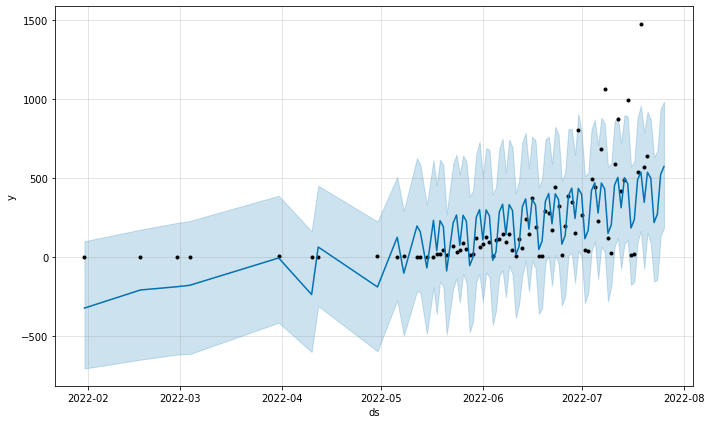

In [ ]:
print(prophet_c.plot(confirmed_forecast))

In [ ]:
model_predictions["Prophet's Model"]=list(confirmed_forecast["yhat"].tail(5))
model_predictions["Prophet's Model"]=model_predictions["Prophet's Model"].astype(int)
model_predictions["Prophet's Upper Bound"]=list(confirmed_forecast["yhat_upper"].tail(5))
model_predictions["Prophet's Upper Bound"]=model_predictions["Prophet's Upper Bound"].astype(int)
model_predictions.head()

,Date,Polynomial Regression,SVR,Holt's Linear Model,Holt's Winter Model,AR Model,MA Model,ARIMA Model,SARIMA Model,Prophet's Model,Prophet's Upper Bound
0,2022-07-22,755,657,822,1075,986,647,1105,1086,499,870
1,2022-07-23,795,681,880,114,1259,655,1047,109,218,630
2,2022-07-24,838,705,937,228,717,663,545,115,272,672
3,2022-07-25,885,730,994,685,782,672,848,629,523,939
4,2022-07-26,937,756,1052,942,1087,680,1282,1569,572,982


# **END**